In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [11]:
dataset = pd.read_csv('DEP_DATASET.csv', encoding= 'unicode_escape')
#Renaming the columns
dataset.columns = ["s1","s2","s3","s4","s5","s6","s7","s8","s9","s10","s11","s12","s13","s14","s15","s16","s17","s18","s19","s20","s21","s22","s23","s24","s25","s26","s27","s28","s29","s30","s31","s32","s33","s34","s35","s36","s37","s38","s39","s40","TYPE_OF_DEPRESSION"]
print('Shape of the dataset: ' + str(dataset.shape))
print(dataset.head())
print(dataset.describe())

Shape of the dataset: (499, 41)
   s1  s2  s3  s4  s5  s6  s7  s8  s9  s10  ...  s32  s33  s34  s35  s36  s37  \
0   1   1   1   1   1   1   1   1   1    1  ...    0    0    0    0    0    0   
1   1   1   1   1   1   1   1   1   1    1  ...    0    0    0    0    0    0   
2   1   1   1   1   1   1   1   1   1    1  ...    0    0    0    0    0    0   
3   1   1   1   1   1   1   1   1   1    1  ...    0    0    0    0    0    0   
4   1   1   1   1   1   1   1   1   1    1  ...    0    0    0    0    0    0   

   s38  s39  s40  TYPE_OF_DEPRESSION  
0    0    0    0          DEPRESSION  
1    0    0    0          DEPRESSION  
2    0    0    0          DEPRESSION  
3    0    0    0          DEPRESSION  
4    0    0    0          DEPRESSION  

[5 rows x 41 columns]
               s1          s2          s3          s4          s5          s6  \
count  499.000000  499.000000  499.000000  499.000000  499.000000  499.000000   
mean     0.248497    0.248497    0.248497    0.248497    0.248

In [3]:
factor = pd.factorize(dataset['TYPE_OF_DEPRESSION'])
dataset.TYPE_OF_DEPRESSION = factor[0]
definitions = factor[1]
print(dataset.TYPE_OF_DEPRESSION.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: TYPE_OF_DEPRESSION, dtype: int64
Index(['DEPRESSION', 'Anxiety', 'PTSD', 'Bipolar'], dtype='object')


In [4]:
#Splitting the data into independent and dependent variables
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,40].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0]]
The dependent variable: 
[0 0 0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(374, 40) (125, 40) (374,) (125,)


In [6]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [7]:
y_pred = xgb_model.predict(X_test)
print(y_pred)

[2 3 2 2 2 2 2 2 0 3 3 0 1 1 1 3 0 2 2 0 2 2 1 0 2 3 0 3 3 2 3 2 0 0 1 0 2
 0 3 3 3 1 3 2 2 1 3 0 0 3 1 1 2 3 3 1 3 1 2 1 2 2 0 2 1 0 3 1 0 3 3 3 1 0
 1 2 0 3 3 3 2 1 0 2 1 1 0 2 2 1 3 1 2 1 0 0 3 1 3 0 0 1 3 1 3 1 1 3 2 2 0
 0 1 3 2 2 1 2 1 0 3 2 1 0 2]


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        32

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



<AxesSubplot:>

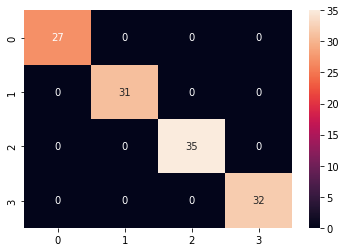

In [14]:
import seaborn as sns
sns.heatmap(conf_matrix,annot=True)

In [20]:
#using k-fold
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    print(accuracy_score(y_test,y_pred))

1.0
1.0
1.0
1.0
1.0
